<a href="https://colab.research.google.com/github/sokrypton/ColabDesign/blob/v1.1.1/esm_msa/example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
if not os.path.exists("colabdesign"):
  os.system("pip -q install git+https://github.com/sokrypton/ColabDesign.git@v1.1.1")
  os.system("ln -s /usr/local/lib/python3.7/dist-packages/colabdesign colabdesign")
  os.system("curl -fsSL https://files.ipd.uw.edu/krypton/esm_msa_jax_v1.pkl.gz | gunzip > esm_msa.pkl")

In [2]:
from colabdesign import esm_msa
import numpy as np
import jax
import matplotlib.pyplot as plt

(64, 146)


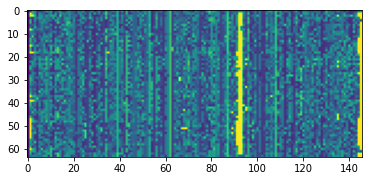

In [3]:
%shell wget -qnc https://github.com/sokrypton/ColabDesign/raw/v1.1.1/esm_msa/test_msa.npy
tokens = np.load('test_msa.npy')[0]
print(tokens.shape)
plt.figure()
plt.imshow(tokens)
plt.show()

In [4]:
model, alphabet = esm_msa.pretrained.get_model()
_ = model.init(model.key, tokens)
model.load_params('esm_msa.pkl')

In [5]:
result = model(tokens)
print(result.keys())

dict_keys(['col_attentions', 'contacts', 'logits', 'row_attentions'])


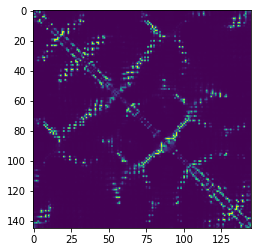

In [6]:
contacts = result['contacts']
plt.figure()
plt.imshow(contacts)
plt.show()